## <b>금리와 환율 변화, 섹터 별 ETF 가격의 상관관계 분석</b>
### Fluctuation of interest rate and exchange rate, Analysis of ETF prices in various sectors

- 금리/환율을 고려하여 섹터별 ETF 가격과의 상관관계를 분석, 어떤 섹터의 ETF 조합으로 동기간 KOSPI200 지수를 초과할 수 있는 수익을 낼 지 연구
---

- All rights reserved, 2024. By Young-Jun Ma.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

kodex_200 = pd.read_csv('./src/069500.KS.csv')

kodex_200.fillna(method='ffill')

ticker_list = ['interest_rate.csv',
               'exchange_rate.csv']
            #    '069500.KS.csv',
            #    '091160.KS.csv',
            #    '091170.KS.csv',
            #    '091180.KS.csv',
            #    '102960.KS.csv',
            #    '117700.KS.csv',
            #    '140710.KS.csv',
            #    '266360.KS.csv',
            #    '266370.KS.csv',
            #    '266420.KS.csv']

# for name in ticker_list:
#     df = pd.read_csv(f'./src/{name}')
#     df.dropna()
#     # print(name, df.iloc[0, 0].replace('/','-').split('-'))
#     if len(df.iloc[0,:]) <= 2:
#         plt.plot(df.iloc[:,1].pct_change(), alpha=0.7)
#     else:
#         plt.plot(df.iloc[:,5].pct_change(), alpha=0.7)
interest_rate = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/interest_rate.csv')
exchange_rate = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/exchange_rate.csv')
kodex_200 = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/069500.KS.csv')
kodex_auto = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/091160.KS.csv')
kodex_semi = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/091170.KS.csv')
kodex_bank = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/091180.KS.csv')
kodex_heath = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/102960.KS.csv')
kodex_arch = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/117700.KS.csv')
kodex_it = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/140710.KS.csv')
kodex_media = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/266360.KS.csv')
kodex_trans = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/266370.KS.csv')
kodex_mecha = pd.read_csv(f'C:/Users/82105/Documents/GitHub/big_data_mining/src/266420.KS.csv')

# print(name, df.iloc[0, 0].replace('/','-').split('-'))
# plt.rc('font', family='Mangun Gothic')
# plt.figure(figsize=(5,3), dpi=500)
# plt.plot(df1.iloc[:,1].pct_change(), alpha=0.7, c='r', label='interest rate')
# plt.plot(df2.iloc[:,1].pct_change(), alpha=0.7, c='b', label='exchange rate')
# plt.legend()

# plt.plot(kodex_200.iloc[100:,5], label='KODEX 200')
# plt.legend()
# print(len(kodex_200))


c:\Users\82105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\82105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


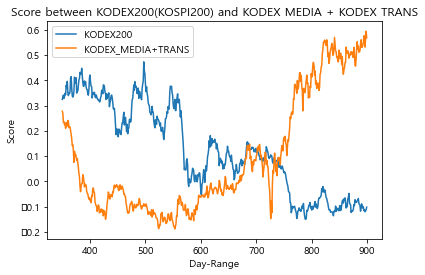

3576 900


In [73]:
period = 350
kospi = kodex_200[kodex_200['Date'] >= '2009-05-04'].iloc[:,4].pct_change(periods=period)
kodex_media_trans = (kodex_media[kodex_media['Date'] >= '2009-01-04'].iloc[:,4] + kodex_trans[kodex_trans['Date'] >= '2009-01-04'].iloc[:,4]).pct_change(periods=period)
kodex_media_trans = kodex_media_trans[:900]
import matplotlib.pyplot as plt


plt.plot(list(range(0,len(kodex_media_trans))), kospi[0:len(kodex_media_trans)], label='KODEX200')
plt.plot(list(range(0,len(kodex_media_trans))), kodex_media_trans, label='KODEX_MEDIA+TRANS')
plt.title("Score between KODEX200(KOSPI200) and KODEX MEDIA + KODEX TRANS")
plt.xlabel("Day-Range")
plt.ylabel("Score")
plt.legend()
plt.show()
print(len(kospi), len(kodex_media_trans))

In [44]:
# df1과 df2간 상관관계 계산 
# correlation between df1 and df2

period_list = []

period = 350
# for period in range(1000):
result = pd.concat([interest_rate.iloc[:,1].pct_change(periods=period), 
                    exchange_rate.iloc[:,1].pct_change(periods=period),
                    kodex_200[kodex_200['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_auto[kodex_auto['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_semi[kodex_semi['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_bank[kodex_bank['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_heath[kodex_heath['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_arch[kodex_arch['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_it[kodex_it['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_media[kodex_media['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_trans[kodex_trans['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    kodex_mecha[kodex_mecha['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                    ], axis=1)
result.columns = ['interest rate', 
                    'exchange rate',
                    'kodex_200',
                    'kodex_auto',
                    'kodex_semi',
                    'kodex_bank',
                    'kodex_heath',
                    'kodex_arch',
                    'kodex_it',
                    'kodex_media',
                    'kodex_trans',
                    'kodex_mecha'
                    ]
temp_corr = result.corr().iloc[0,1]
# print(f"Range: {period}  ", temp_corr)
if period != 0:
    period_list.append((period, temp_corr))

result.corr()

,interest rate,exchange rate,kodex_200,kodex_auto,kodex_semi,kodex_bank,kodex_heath,kodex_arch,kodex_it,kodex_media,kodex_trans,kodex_mecha
interest rate,1.000000,0.512813,-0.460696,-0.322514,-0.470139,-0.156102,0.603889,0.161439,-0.337878,0.166318,0.125191,0.266082
exchange rate,0.512813,1.000000,-0.291820,-0.143209,-0.318034,-0.217922,0.147412,-0.124022,0.283501,-0.652489,-0.628642,-0.544626
kodex_200,-0.460696,-0.291820,1.000000,0.873423,0.654508,0.654875,-0.079599,-0.373649,0.403819,0.644762,0.590175,0.545271
kodex_auto,-0.322514,-0.143209,0.873423,1.000000,0.637842,0.321296,-0.202104,-0.383601,0.438981,-0.161798,-0.164059,0.364355
kodex_semi,-0.470139,-0.318034,0.654508,0.637842,1.000000,0.300157,-0.287093,-0.264867,0.463944,0.370770,0.350694,0.510327
kodex_bank,-0.156102,-0.217922,0.654875,0.321296,0.300157,1.000000,0.094438,-0.299052,-0.110530,0.922741,0.825750,0.480904
kodex_heath,0.603889,0.147412,-0.079599,-0.202104,-0.287093,0.094438,1.000000,0.426228,-0.237868,-0.002741,0.020193,-0.255077
kodex_arch,0.161439,-0.124022,-0.373649,-0.383601,-0.264867,-0.299052,0.426228,1.000000,-0.365920,-0.505710,-0.556632,-0.364464
kodex_it,-0.337878,0.283501,0.403819,0.438981,0.463944,-0.110530,-0.237868,-0.365920,1.000000,0.591341,0.621554,0.710390
kodex_media,0.166318,-0.652489,0.644762,-0.161798,0.370770,0.922741,-0.002741,-0.505710,0.591341,1.000000,0.909578,0.780926


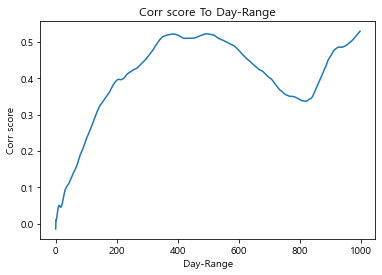

[-0.014433376012914773, 0.010141300266495559, 0.00885666345989501, 0.013381017614036176, 0.01864435938251589, 0.02535678904801585, 0.031910792858935645, 0.03754769678813217, 0.042318183742731344, 0.045817002736166824, 0.049016050780682434, 0.05013961055188187, 0.04962911945235881, 0.04933184602926144, 0.047841149358680474, 0.04716639234630339, 0.045704134853848354, 0.04511833449023731, 0.04644353003439294, 0.04859219951250662, 0.05092640292159029, 0.053498092642918965, 0.056741544369871805, 0.060486207044296386, 0.06451626528190607, 0.06921115411372393, 0.07389616561327321, 0.0779777335080958, 0.08221799154167762, 0.08584859322892954, 0.08996933258291805, 0.09278854202535847, 0.09482376737359985, 0.0969964056544748, 0.09886496630681893, 0.1006884246294493, 0.10186779155898867, 0.1032059264991327, 0.10457106300576773, 0.10587020560854793, 0.10673044288344893, 0.10742671643915867, 0.10861728635643222, 0.11010247451210937, 0.11195225002088635, 0.11387585175035207, 0.1156382596779573, 0.11

In [43]:
period_list = []

# period = 90
for period in range(1000):
    result = pd.concat([interest_rate.iloc[:,1].pct_change(periods=period), 
                        exchange_rate.iloc[:,1].pct_change(periods=period),
                        kodex_200[kodex_200['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_auto[kodex_auto['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_semi[kodex_semi['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_bank[kodex_bank['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_heath[kodex_heath['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_arch[kodex_arch['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_it[kodex_it['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_media[kodex_media['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_trans[kodex_trans['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        kodex_mecha[kodex_mecha['Date'] >= '2010-01-04'].iloc[:,4].pct_change(periods=period),
                        ], axis=1)
    result.columns = ['interest rate', 
                        'exchange rate',
                        'kodex_200',
                        'kodex_auto',
                        'kodex_semi',
                        'kodex_bank',
                        'kodex_heath',
                        'kodex_arch',
                        'kodex_it',
                        'kodex_media',
                        'kodex_trans',
                        'kodex_mecha'
                        ]
    temp_corr = result.corr().iloc[0,1]
    # print(f"Range: {period}  ", temp_corr)
    if period != 0:
        period_list.append((period, temp_corr))
import math
max(period_list, key=lambda x: x[1])
only_data = list(map(lambda x: x[1], period_list))


import matplotlib.pyplot as plt


plt.plot(only_data)
plt.title("Corr score To Day-Range")
plt.xlabel("Day-Range")
plt.ylabel("Corr score")
plt.show()
print(only_data)

In [47]:
import math
import numpy as np

for k in range(1, 500, 10):
    month_result = []

    for i in range(0, len(interest_rate.iloc[:,1]), k):
        temp_result = pd.concat([interest_rate.iloc[i:i+k,1].pct_change(), exchange_rate.iloc[i:i+k,1].pct_change()], axis=1)
        temp_result = temp_result.corr().iloc[0, 1]
        month_result.append(temp_result)


    print(np.nanmean(month_result))
    # month_result
    # print(sum(month_result) / len(month_result))

<ipython-input-47-799571bae304>:13: RuntimeWarning: Mean of empty slice
  print(np.nanmean(month_result))


nan
-0.022141500287085808
-0.0004615471809422163
-0.011448607130383325
-0.007929952265724564
-0.00508368511419177
-0.013675750112708223
-0.01134567597718017
-0.01574591887059198
-0.019336524268590848
-0.01847701373851202
-0.010520910983079257
-0.02050581194999854
-0.01576540289109918
-0.00784713633458806
-0.021783683588196153
-0.0066178087494169
-0.014150473249505777
-0.013772885567240156
-0.013007149256358168
-0.0062486993665188395
-0.012000389292548114
-0.01746847528072434
-0.012201274128350963
-0.019095991939540233
-0.013062515904341892
0.0024249377807913303
-0.007776304577292419
-0.008289197992364283
-0.007921930497435156
-0.02284999155424273
-0.02192906388027665
-0.009898306373347342
-0.0068595742153179295
-0.010556748944388074
-0.016225196071572384
-0.006374768454222864
-0.0009475652578025545
-0.009101913858149088
-0.011173355206619209
-0.005553238842624903
-0.006206059989265433
-0.0018195667862380648
-0.013981797273756275
-0.015161771791931886
-0.020357238180178948
-0.0104756279

In [6]:
test1 = pd.Series([2,6,8,16])
test2 = pd.Series([2,6,8,16])
total = pd.concat([test1.pct_change(), test2.pct_change()], axis=1)
total.corr()

,0,1
0,1.0,1.0
1,1.0,1.0
